# Import Libraries and Packages

In [1]:
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
import time
import numpy as np
import pandas as pd
import scipy.stats as st
from datetime import datetime

# Update Display Settings for Pandas

In [2]:
#set display settings for pandas
pd.set_option('display.max_rows', None, 'display.max_columns', None)

# Load CSV file into Dataframe

In [3]:
# Load the CSV file into a pandas DataFrame
csv_file_name = 'NBAPlayerDailyStats.csv'
final_df = pd.read_csv(csv_file_name)
#final_df.info()

# Cleaning Dataframe Steps

In [4]:
#drop blank columns
final_df = final_df.drop(final_df.columns[[2,4]], axis=1)

#create new column and convert Minutes Played to float data type
final_df['Minutes Played Conversion'] = pd.to_datetime(final_df['Minutes Played'], format='%M:%S')
final_df['Minutes Played Conversion'] = ((final_df['Minutes Played Conversion'].dt.minute * 60) + \
                                         (final_df['Minutes Played Conversion'].dt.second)) / 60

# Convert 'date' column to DateTime and set as index
final_df['Game Date'] = pd.to_datetime(final_df['Game Date'])
final_df.set_index('Game Date', inplace=True)

# Defined Functions

In [53]:
def top_N_players_by_minutes(top_n_input):
    """
    Generate dataframe of top of NBA players by average minutes played and display top N by team in descending order
    
    Argument: top_n_input - The top N players you want to retriever.

    """    
    unique_players = final_df[['Tm','Player','Minutes Played Conversion']]
    unique_players_avg = unique_players.groupby(['Tm','Player'])['Minutes Played Conversion'].mean().reset_index()
    unique_players_avg_ordered = unique_players_avg.sort_values(by = ['Tm','Minutes Played Conversion'], ascending=False).groupby(['Tm']).head(top_n_input)
    return(unique_players_avg_ordered)

def confidence_intervals_large_sample(df):

    # Calculate 95% confidence interval using norm.interval (for large samples)
    conf_interval_norm_50 = st.norm.interval(confidence=0.95, loc=np.mean(df['Points']), scale=st.sem(df['Points']))
    print("95% Confidence Interval (Normal Distribution):", conf_interval_norm_50)

def confidence_intervals_small_sample(df):    
    # Calculate 95% confidence interval using t.interval (for small samples or unknown population standard deviation)
    conf_interval_t_25 = st.t.interval(confidence=0.95, df=len(df['Points'])-1, loc=np.mean(df['Points']), scale=st.sem(df['Points']))
    print("95% Confidence Interval (T Distribution):", conf_interval_t_25)
    
def top_players_by_team(team_input):
    betting_player_df = top_N_players_by_minutes(4)
    team_values_to_find = [team_input]
    betting_player_df_final = betting_player_df[betting_player_df['Tm'].isin(team_values_to_find)]
    return(betting_player_df_final)

def standard_deviation_points(team_input):
    """
    find standard deviation for Points by Team
    
    Argument: team_input - NBA team

    """       
    std_by_category = final_df.groupby(['Tm','Player'])['Points'].std().reset_index()
    std_by_category_filtered = std_by_category[std_by_category['Tm'] == team_input]
    std_by_category_sorted = std_by_category_filtered.sort_values(by = ['Tm','Points'], ascending=True).groupby(['Tm']).head(5)
    return(std_by_category_sorted)

def correlation_matrix(player):
    """
    Generate correlation matrix for player end-user selects.
    
    Argument: player.

    """     
    df_pcorr = final_df.copy()
    df_pcorr_filtered = final_df[final_df['Player'] == player]
    df_pcorr_filtered.drop(['FGA','Field Goal Percentage','3-Point Field Goal Attempts','3-Point Field Goal Percentage',\
                            'Free Throw Attempts', 'Free Throw Percentage', 'Personal Fouls','Total Rebounds',\
                           'Tm','Opp','Minutes Played','Plus/Minus','GmSc'], axis=1, inplace=True)
    corr_player = df_pcorr_filtered.corr()
    corr_player
    return(sns.heatmap( corr_player, annot=True, fmt = '.2f', cmap='crest'))

def box_plots_df(player):
    """
    Generate dataframes of last 5, 10,15,20,25 games to see trends in data.
    
    Argument: player.

    """    
    global df_filter_analysis_last_5
    global df_filter_analysis_last_10
    global df_filter_analysis_last_15
    global df_filter_analysis_last_20
    global df_filter_analysis_last_25
    global df_filter_analysis_last_50
    df_filter_analysis_last_5  = ((final_df[final_df['Player'] == player]).sort_values(by='Game Date',ascending=False)).head(5)
    df_filter_analysis_last_10 = ((final_df[final_df['Player'] == player]).sort_values(by='Game Date',ascending=False)).head(10)
    df_filter_analysis_last_15 = ((final_df[final_df['Player'] == player]).sort_values(by='Game Date',ascending=False)).head(15)
    df_filter_analysis_last_20 = ((final_df[final_df['Player'] == player]).sort_values(by='Game Date',ascending=False)).head(20)
    df_filter_analysis_last_25 = ((final_df[final_df['Player'] == player]).sort_values(by='Game Date',ascending=False)).head(25)
    df_filter_analysis_last_50 = ((final_df[final_df['Player'] == player]).sort_values(by='Game Date',ascending=False)).head(50)

def box_whisker_plot_trends(nba_metric):
    """
    Generate box and whisker plots using last 5, 10,15,20,25 games to see trends in data.

    Argument: nba_metric.

    """    
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns # Create subplots
    c = "lightgreen"
    b = "black"
    # Create box plots for each DataFrame
    df_filter_analysis_last_5.boxplot(column=nba_metric,ax=axes[0, 0],patch_artist=True,
                boxprops=dict(facecolor=c, color=b),
                capprops=dict(color=b),
                whiskerprops=dict(color=b),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=b))

    axes[0, 0].set_title('Past 5 Games')

    df_filter_analysis_last_10.boxplot(column=nba_metric,ax=axes[0, 1],patch_artist=True,
                boxprops=dict(facecolor=c, color=b),
                capprops=dict(color=b),
                whiskerprops=dict(color=b),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=b))
    axes[0, 1].set_title('Past 10 Games')

    df_filter_analysis_last_15.boxplot(column=nba_metric,ax=axes[1, 0],patch_artist=True,
                boxprops=dict(facecolor=c, color=b),
                capprops=dict(color=b),
                whiskerprops=dict(color=b),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=b))
    axes[1, 0].set_title('Past 15 Games')

    df_filter_analysis_last_20.boxplot(column=nba_metric,ax=axes[1, 1],patch_artist=True,
                boxprops=dict(facecolor=c, color=b),
                capprops=dict(color=b),
                whiskerprops=dict(color=b),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=b))
    axes[1, 1].set_title('Past 20 Games')

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

def time_series_plot(df_time_series_plot):
    """
    Generate time series plot using dataframe.

    Argument: df_time_series_plot, nba_metric.

    """      
    # Create the time series plot
    plt.figure(figsize=(8,4)) # Optional: Adjust figure size
    plt.plot(df_time_series_plot.index, df_time_series_plot['Points'],marker='x')
    plt.plot(df_time_series_plot.index, df_time_series_plot['Total Rebounds'],marker='x')
    #plt.plot(df_time_series_plot.index, df_time_series_plot['Total Rebounds'],marker='x')
    plt.xlabel('Game Date')
    plt.ylabel('Value')
    plt.title('Time Series Plot')
    plt.grid(True)
    plt.show()

def density_plot_points(df):
    sns.kdeplot(df['Points'])
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.title("Density Plot of Data")
    plt.show()

def historgram_plot_points(df, x_val):
    """
    Generate linear regression plot using dataframe and end-user metrics .

    Argument: df, x_val

    """    
    sns.histplot(data=df, x=x_val, stat="percent",\
                 discrete=True, kde=True ,bins = round(math.sqrt(len(df))))
    
def reg_line_plot(df_reg_line_plot, x_val, y_val):
    """
    Generate linear regression plot using dataframe and end-user metrics .

    Argument: df_time_series_plot, x_val, y_val.

    """       
    sns.regplot(x=x_val, y=y_val, data=df_reg_line_plot)
    plt.show()
    
def tm_histogram(df):
    # Calculate the number of rows and columns for the subplots
    num_cols = 5
    num_rows = 4

    # Unique groups for subplots
    groups = df['Player'].unique()

    # Create subplots (5 columns, 4 rows)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 16))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Ensure we don't exceed the number of subplots
    num_subplots = min(len(groups), 20)

    # Generate histograms for each group
    for i in range(num_subplots):
        group = groups[i]
        df[df['Player'] == group]['Points'].hist(ax=axes[i],density=True,label=group,bins = round(math.sqrt(len(df))))#bins = 5)
        axes[i].set_title(f'Group {group}')
        axes[i].legend()

    # Remove any unused subplots if there are fewer than 20 groups
    for i in range(num_subplots, 20):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()    
#steals and #blocks scatterplot
#steals time series
#blocks time series

# End-User Input

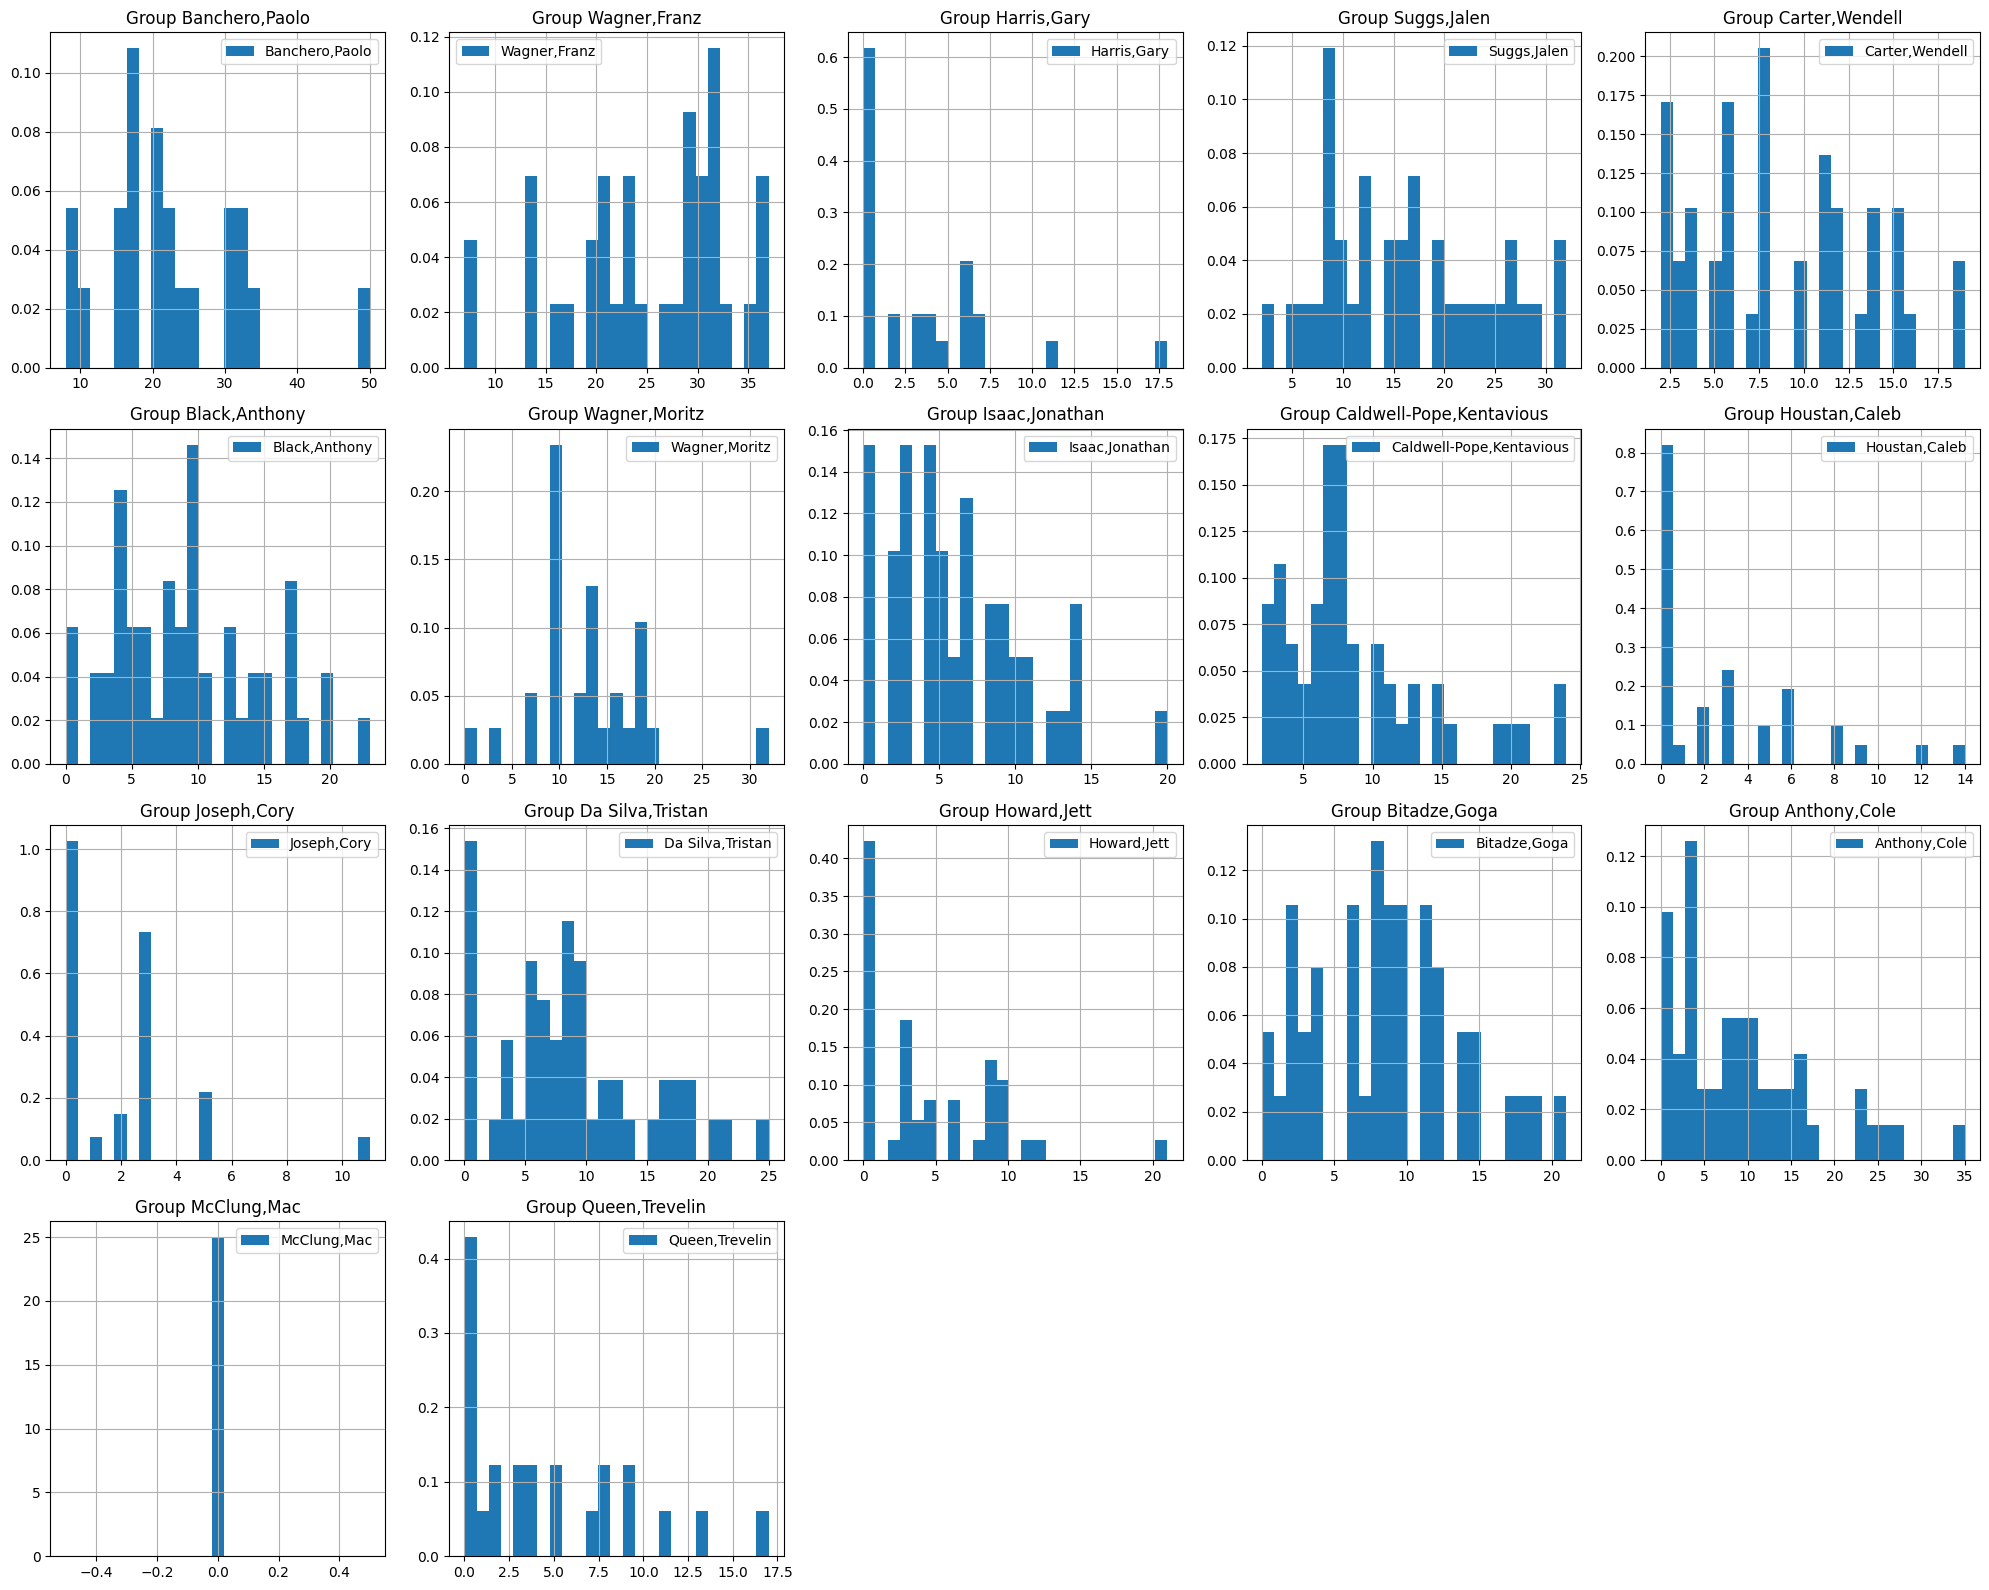

In [56]:
#enter player name
query_data_team = 'ORL'

data = final_df[final_df['Tm'] == query_data_team]
tm_histogram(df = data)